In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Этапы анализа:** 

**1. Общий обзор данных:**(5 баллов)
- Посмотреть на данные в целом, какой их объем, сколько значений, какие значения могут принимать столбцы, какие могут быть типы данных, есть ли пропуски и т.д. 

**2. Провести визуальный анализ:** (5 баллов)
- Построить всевозможные графики и диаграммы, чтобы выявить закономерности в данных. Диаграммы можно строить как для отдельных показателей, так и для пар показателей, ограничений нет. 
- Посмотреть на полученные визуализации и прокомментировать, что видите на них, какие зависимости, какие возможные причины 
таких зависимостей (написать комментарий в ячейке)

**3. Корреляционный анализ:** (5 балов)
- Построить корреляционную матрицу
- На основе корреляционной матрицы построить тепловую карту для удобства анализа. Проанализировать полученные коэффициенты.
- Прокомментировать, какие из факторов больше всего/ меньше всего коррелируют с ценой помещений, подумать о возможных причинах корреляции.
-Прокомментировать, какие факторы коррелируют между собой, подумать о возможных причинах корреляции. 


**Описание данных:**
* **crime_level** - уровень преступности на душу населения по городам
* **non_retail** - доля неторговых площадей по городам каждом городе
* **nox** - концентрация оксидов азота (частей на 10 миллионов)
* **room_number** - среднее количество комнат на одно жилище
* **job_center_dist** - взвешенные расстояния до основных пяти центров занятости
* **rad** - показатель доступности радиальных магистралей
* **property_tax** - полная стоимость налога на недвижимость на 10 000 долларов
* **pt_ratio** - соотношение учеников и учителей в городах
* **b** - рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам
* **low_stat** - процент населения низкого социального статуса
* **median_price** - средняя стоимость помещений, в 1000 долларов


In [2]:
df = pd.read_csv('house_prices_data.csv')
df.head()

,crime_level,non_retail,nox,room_number,job_center_dist,rad,property_tax,pt_ratio,b,low_stat,median_price
0,0.00632,2.31,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**1. Общий анализ**

In [3]:
df.size

5500

In [4]:
df.shape

(500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   crime_level      500 non-null    float64
 1   non_retail       500 non-null    float64
 2   nox              500 non-null    float64
 3   room_number      500 non-null    float64
 4   job_center_dist  500 non-null    float64
 5   rad              500 non-null    float64
 6   property_tax     500 non-null    float64
 7   pt_ratio         500 non-null    float64
 8   b                500 non-null    float64
 9   low_stat         500 non-null    float64
 10  median_price     500 non-null    float64
dtypes: float64(11)
memory usage: 43.1 KB


In [6]:
df.describe()

,crime_level,non_retail,nox,room_number,job_center_dist,rad,property_tax,pt_ratio,b,low_stat,median_price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.655786,11.131740,0.554451,6.282970,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,8.644375,6.900712,0.116550,0.705421,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,0.006320,0.460000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082598,5.130000,0.448750,5.883000,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,0.266005,9.125000,0.538000,6.208500,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,3.694070,18.100000,0.624000,6.620500,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,88.976200,27.740000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isna().any()

crime_level        False
non_retail         False
nox                False
room_number        False
job_center_dist    False
rad                False
property_tax       False
pt_ratio           False
b                  False
low_stat           False
median_price       False
dtype: bool

***По итогу анализа: исследуемый файл содержит 11 параметров (столбцов) и 500 строк. Все столбцы имеют тип данных числовой с плавающей точкй (float64). Явных пропусков (NaN) в данных нет.***

**2. Визуальный анализ**

По моим представлениям, наибольшее влияние на среднюю цену помещения оказывают следующие факторы: crime_level, room_number, rad, property_tax, low_stat.
Построим графики и проверим правильность моих представлений.

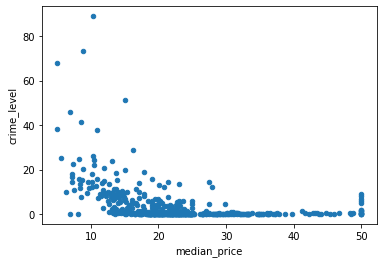

In [8]:
df.plot.scatter(x='median_price', y='crime_level')

Как мы видим, в районах с высокой преступностью цена помещения минимальна

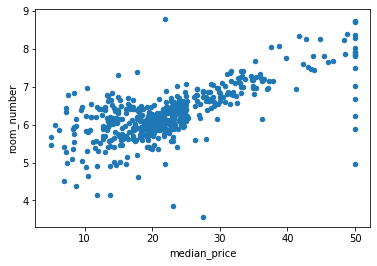

In [9]:
df.plot.scatter(x='median_price', y='room_number')

Как можно увидеть, связь сильная положительная.

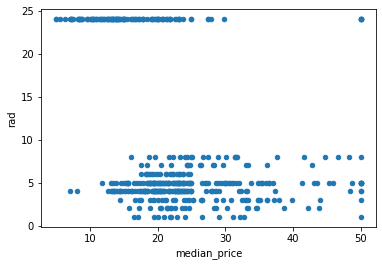

In [10]:
df.plot.scatter(x='median_price', y='rad')

In [ ]:
Если магистраль очень далеко, то и цены на жильё низкие.

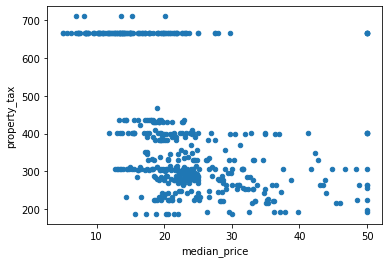

In [11]:
df.plot.scatter(x='median_price', y='property_tax')

In [ ]:
При высоких налогах на помещения средняя цена низка.

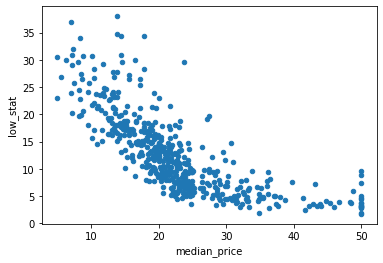

In [12]:
df.plot.scatter(x='median_price', y='low_stat')

Как мы видим, между двумя переменными сильная отрицательная связь, т.е. чем больше асоциальных элементов, тем ниже цена помещения.

Построим графики для всех переменных и их взаимосвязи между собой.

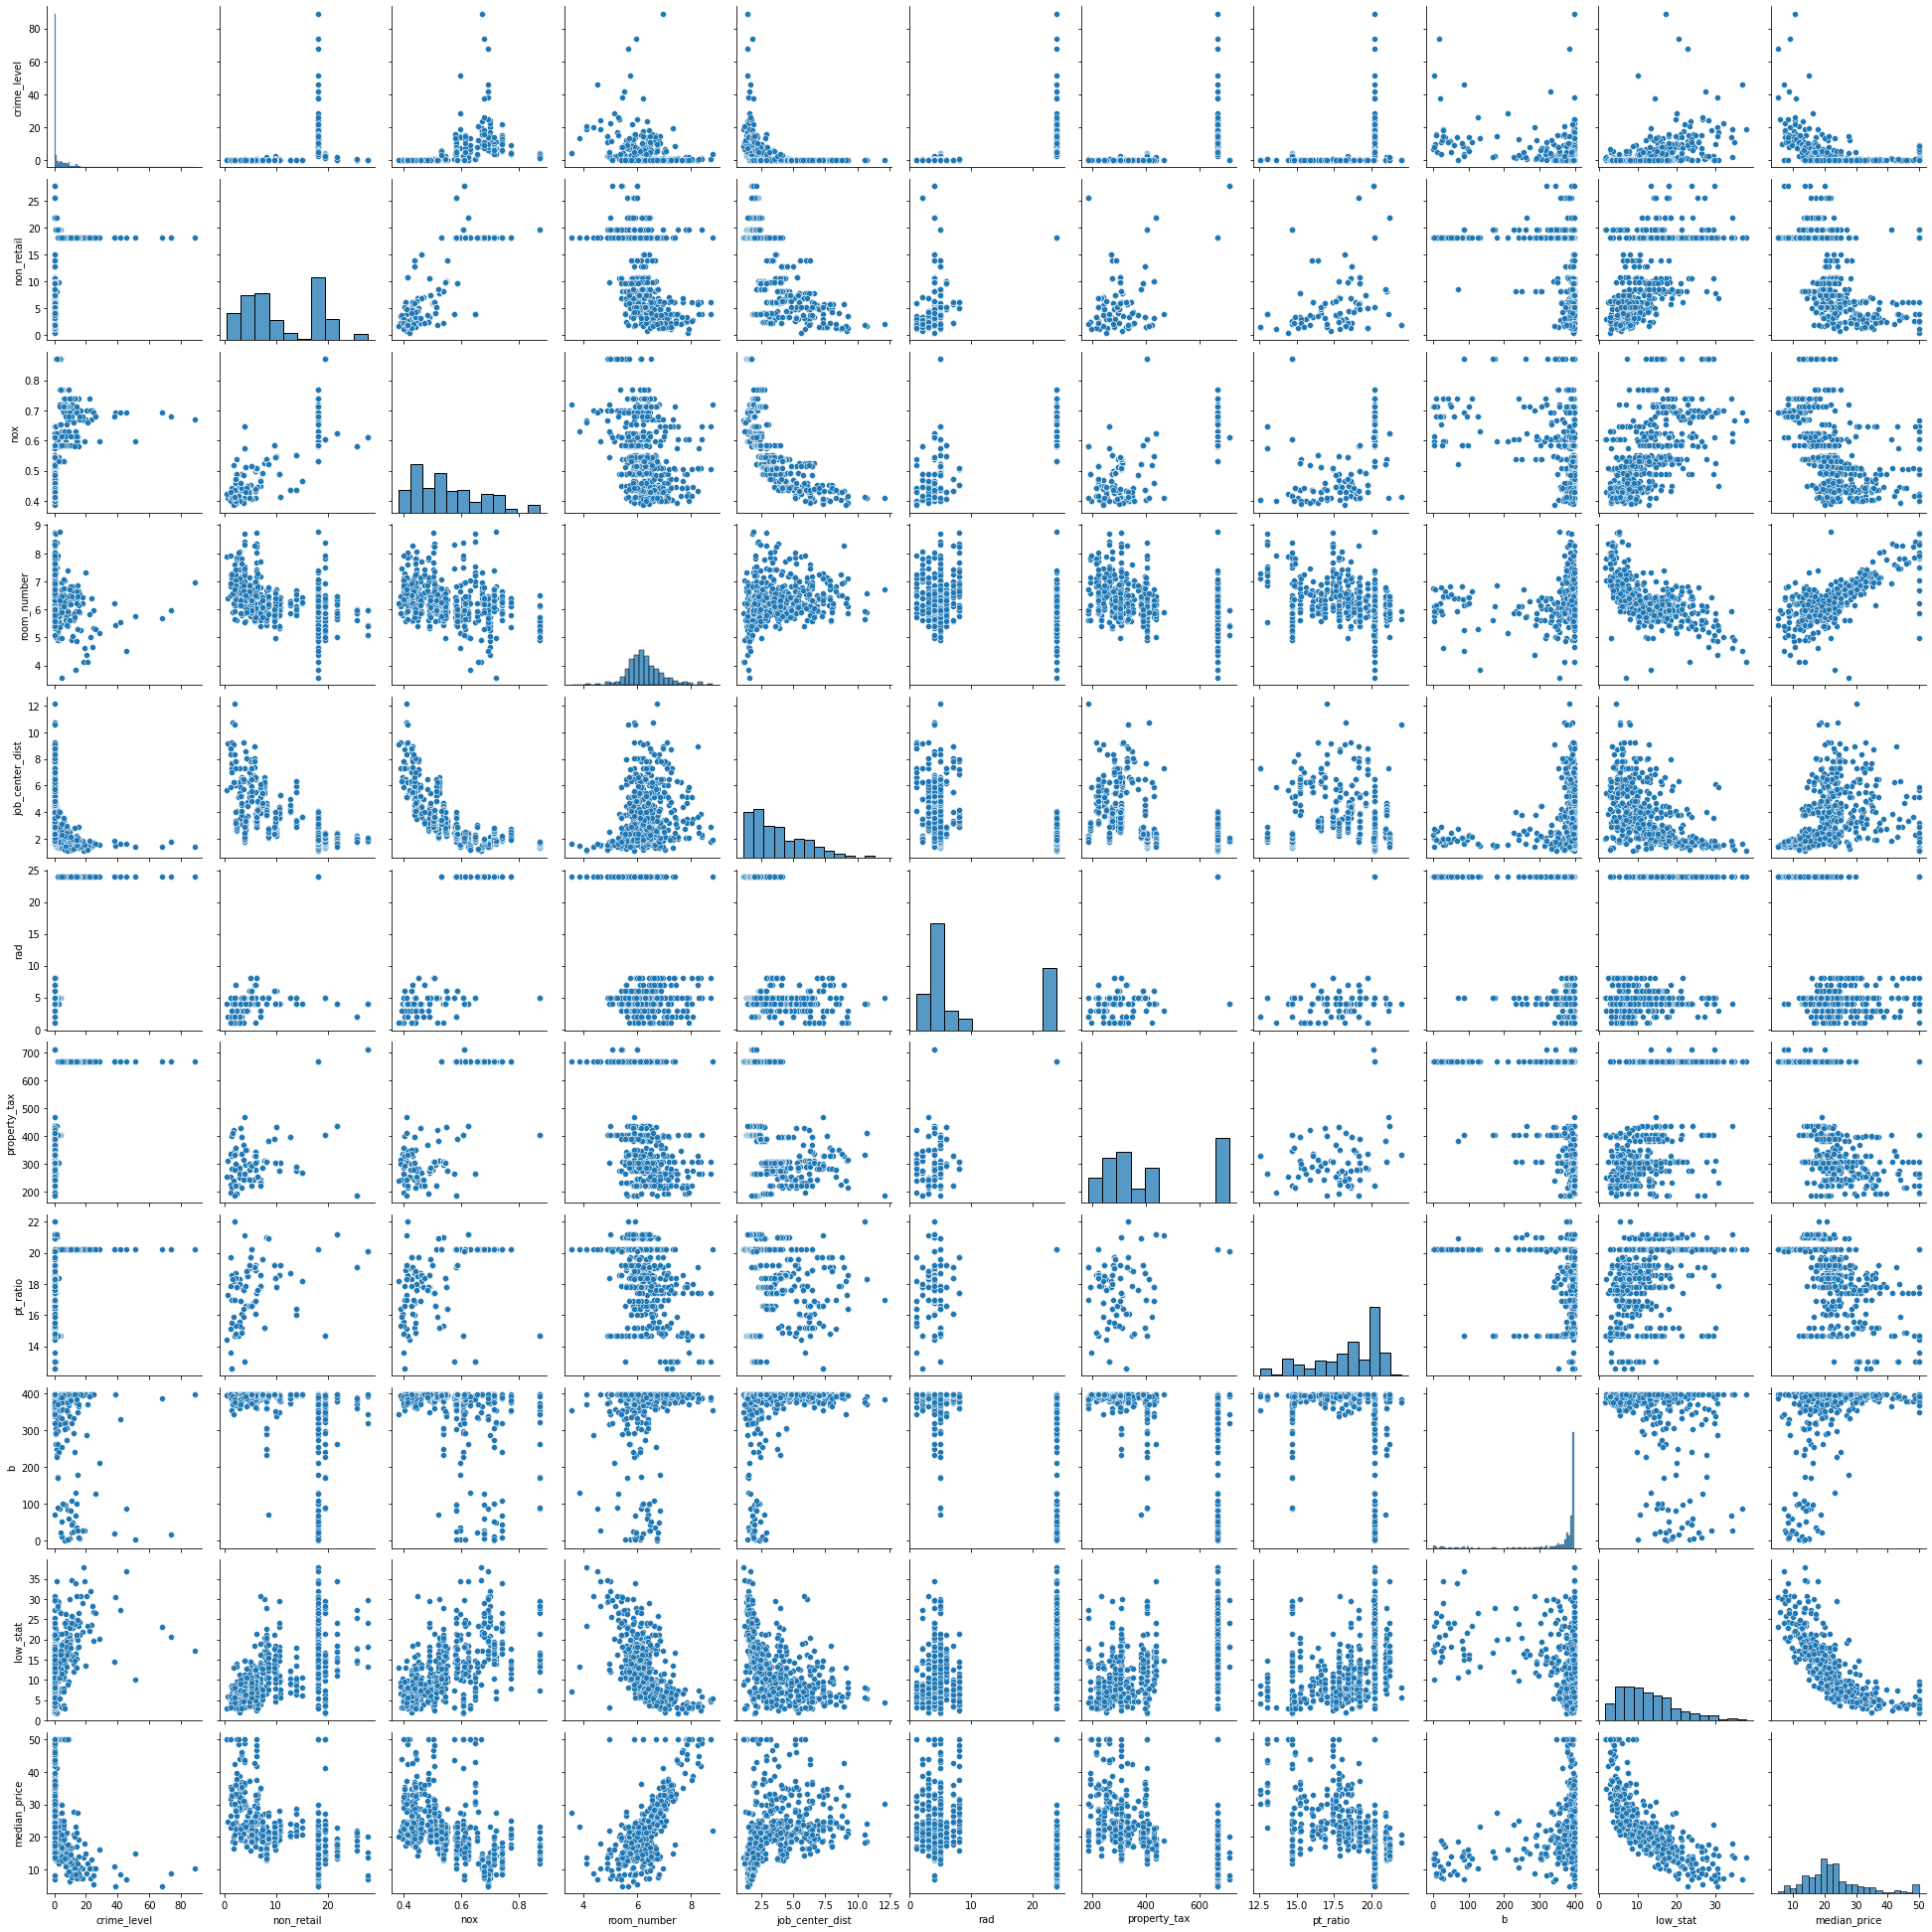

In [13]:
columns_to_plot =['crime_level', 'non_retail', 'nox', 'room_number', 'job_center_dist', 'rad', 'property_tax', 'pt_ratio', 'b', 'low_stat', 'median_price']
sns.pairplot(df[columns_to_plot]);

Можно увидеть, что распределение по количествам комнат близко к нормальному.
Также у параметра rad значения распределены на 2 разные группы. Нужно лучше исследовать данный параметр и выявить принцип данного распределения/

По результатам зависимостей расписал больше в блоке с корреляционным анализом.

**3. Корреляционный анализ**

In [14]:
df.corr()

,crime_level,non_retail,nox,room_number,job_center_dist,rad,property_tax,pt_ratio,b,low_stat,median_price
crime_level,1.000000,0.407351,0.422339,-0.218919,-0.384391,0.624880,0.581835,0.297472,-0.383776,0.454628,-0.390960
non_retail,0.407351,1.000000,0.763810,-0.393012,-0.709502,0.599156,0.724065,0.384794,-0.357710,0.606354,-0.484606
nox,0.422339,0.763810,1.000000,-0.303151,-0.770068,0.616414,0.671652,0.188255,-0.381440,0.593524,-0.427432
room_number,-0.218919,-0.393012,-0.303151,1.000000,0.208031,-0.208559,-0.291159,-0.362163,0.127517,-0.613654,0.696424
job_center_dist,-0.384391,-0.709502,-0.770068,0.208031,1.000000,-0.505664,-0.543241,-0.226258,0.296059,-0.504135,0.248688
rad,0.624880,0.599156,0.616414,-0.208559,-0.505664,1.000000,0.909742,0.482377,-0.442594,0.485830,-0.387305
property_tax,0.581835,0.724065,0.671652,-0.291159,-0.543241,0.909742,1.000000,0.475243,-0.440226,0.541711,-0.473117
pt_ratio,0.297472,0.384794,0.188255,-0.362163,-0.226258,0.482377,0.475243,1.000000,-0.184160,0.385684,-0.508806
b,-0.383776,-0.357710,-0.381440,0.127517,0.296059,-0.442594,-0.440226,-0.184160,1.000000,-0.364732,0.336110
low_stat,0.454628,0.606354,0.593524,-0.613654,-0.504135,0.485830,0.541711,0.385684,-0.364732,1.000000,-0.742236


crime_level - rad = 0,62 - средняя (близко к сильной), 

non_retail
nox
room_number
job_center_dist
rad
property_tax
pt_ratio
b
low_stat
median_price

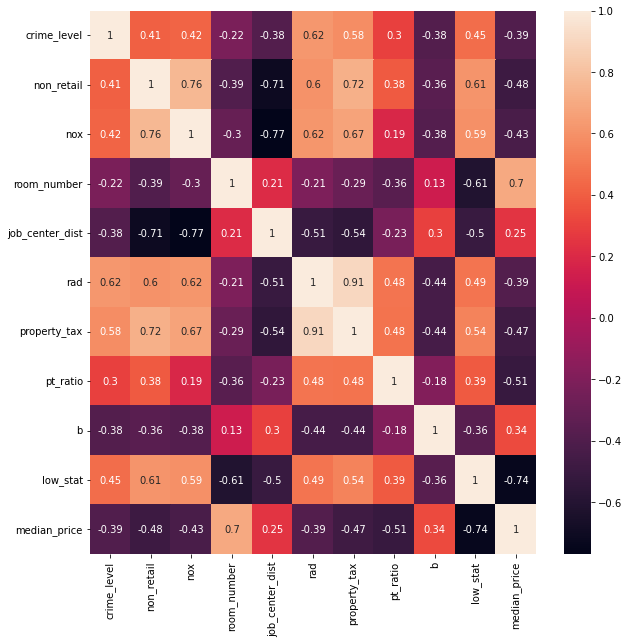

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

**Анализ тепловой карты.**

По итогу анализа можно сделать вывод, что все факторы в той или иной степени коррелируют как с ценой помещения, так и друг с другом (более подробно - ниже).

**Какие из факторов больше всего/меньше всего коррелируют с ценой помещений?**

*Сильнее всего коррелируют с ценой помещения факторы room_number и low_stat.*

*  Корреляция между ценой помещения и количеством комнат - сильная положительная, из чего следует, что чем больше комнат, тем выше цена. В большинстве случаев эта тенденция прослеживается в реальной жизни.
*   Корреляция между ценой и процентом населения низкого социального статуса - сильная отрицательная, что означает, что цена тем ниже, чем больше людей ниского соц. статуса. Также вполне закономерно, поскольку люди готовы потратить большую сумму денег, но обеспечить себе спокойную жизнь

Стоит отметить, что на цену оказывают влияния все факторы, кроме расстояния до центра (0,25 - слабая положительная связь). Данный факт меня удивил, поскольку я думал, что расстояние до центра будет играть большую роль. Но здесь, возможно, сыграло роль, что данные собирались в США, где не так распространены большие города, а больше населённых пунктов, состоящих из нескольких десятков домов, что, соответственно, снижает важность фактора расстояния до центра.

**Какие факторы коррелируют между собой и возможные причины.**

*Сильная положительная связь наблюдается между парами факторов:*
 
*   non_retail - nox (0,76) - концентрация азота - показатель экологичности райнона. Чем выше концентрация азота - тем больше доля неторговых площадей, которые люди не хотят приобретать по причине плохой экологии.
* non_retail - property_tax (0,72) - чем выше налог на определённые участки, тем больше становятся неторговых площадей. Проще говоря, площади становятся неинтересны потенциальным покупателям по причине высоких налогов.
* room_number - median_price (0,696) - связь на несколько сотых ниже того уровня, которой принято считать нижней границей сильной взаимосвязи (0,7). Но связь сильная, что и логично - чем больше комнат - тем выше средняя цена за помещение.
* rad - property_tax (0,91) - чем ближе помещение находится к транспортным магистралям, тем большим налогом оно облагается. В таких помещениях гораздо легче высстраивать логистику, поэтому и уравновешивается высокими налогам.

*Сильная отрицательная связь наблюдается между парами факторов:*
* non_retail - job_center_dist (-0,71) - чем ближе к центрам занятости, тем меньше пустующих площадей. Это логично, поскольку обычно центры занятости распологаются ближе к центру города, а в центре гораздо меньше свободных площади.
* nox - job_center_dist (-0,77) - чем дальше от центров занятости, тем ниже уровень концентрации азота. Эта связь меня удивила и, скорее всего, это как раз из примеров, когда вроде несвязанные параметры дают сильную корреляцию. 

*Но если сделать допущение, что центры занятости располагаются в центре, то, возможны следующие умозаключения:  
Эта связь несколько удивила меня, поскольку я считал, что корреляция между этими двумя параметрами будет сильной положительной, поскольку на окраинах городов располагаются предприятия, которые могут повышать концентрацию азота. Но с другой стороны, чем ближе к центру, тем больше машин и различных помещений, которые повышают уровень концентрации азота. По результатам аналаза выходит, что деятельность в центре гораздо сильнее оказывает влияние на концентрацию уровня азота.*

* low_stat - median_price (-0,74) - чем выше процент населения низкого социального статуса, тем ниже средняя цена помещения. Это значит, что люди не хотят соседствовать с такими представителями населения и готовы мириться с этим только при условии низкой стоимости помещения.